## Maximum likelihood mapmaking

2025-11-23 20:47:09.874 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 98.3MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -2.311e-04
    max: -5.838e-08
    rms: 2.941e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


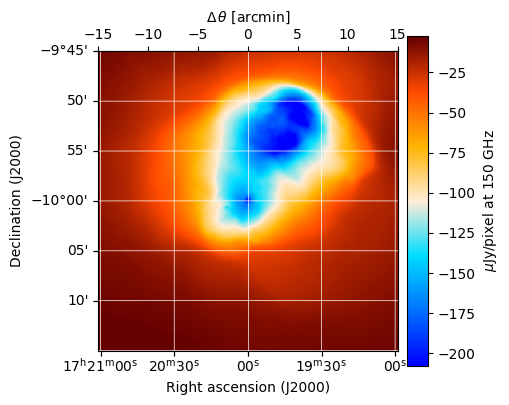

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 2e1 

input_map[..., 256:-256, 256:-256].plot(cmap="cmb")
print(input_map)

PlanList(3 plans, 1800 s):
                           start_time duration   target(ra,dec)     center(az,el)
chunk                                                                            
0      2025-11-24 16:33:26.268 +00:00    600 s     (260°, -10°)  (49.69°, 70.94°)
1      2025-11-24 16:44:03.768 +00:00    600 s     (260°, -10°)  (43.51°, 72.73°)
2      2025-11-24 16:54:41.268 +00:00    600 s  (260°, -9.996°)  (36.09°, 74.29°)


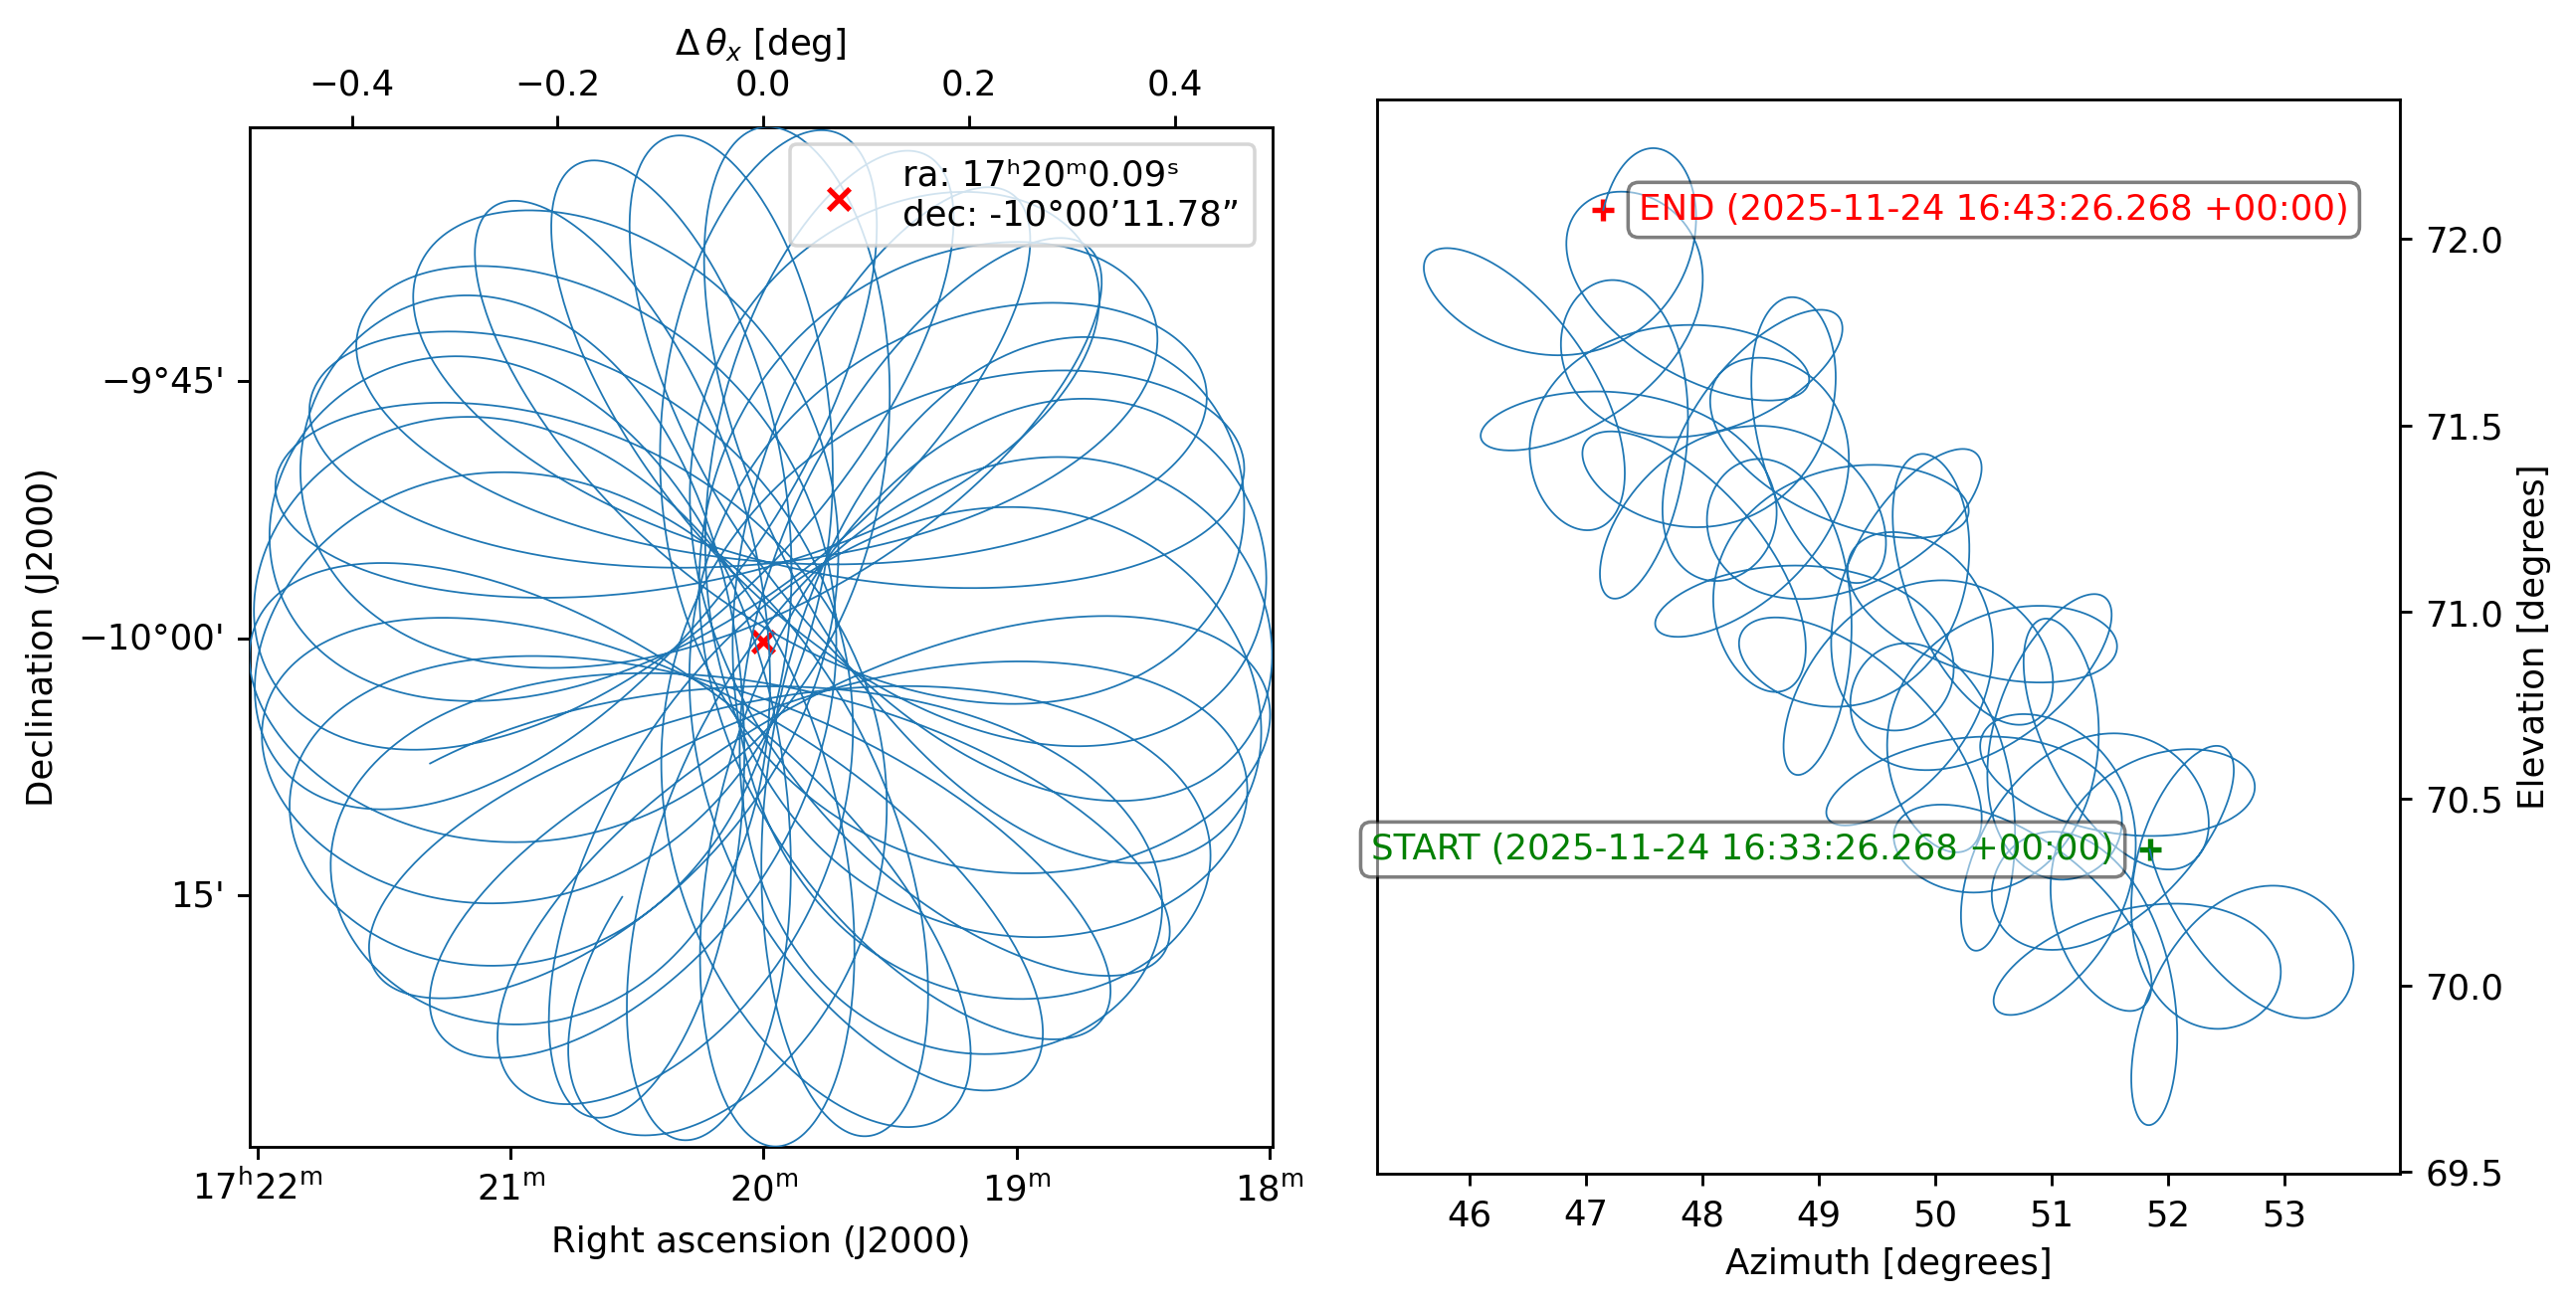

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=1800, 
                               max_chunk_duration=600, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  678  5.953’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


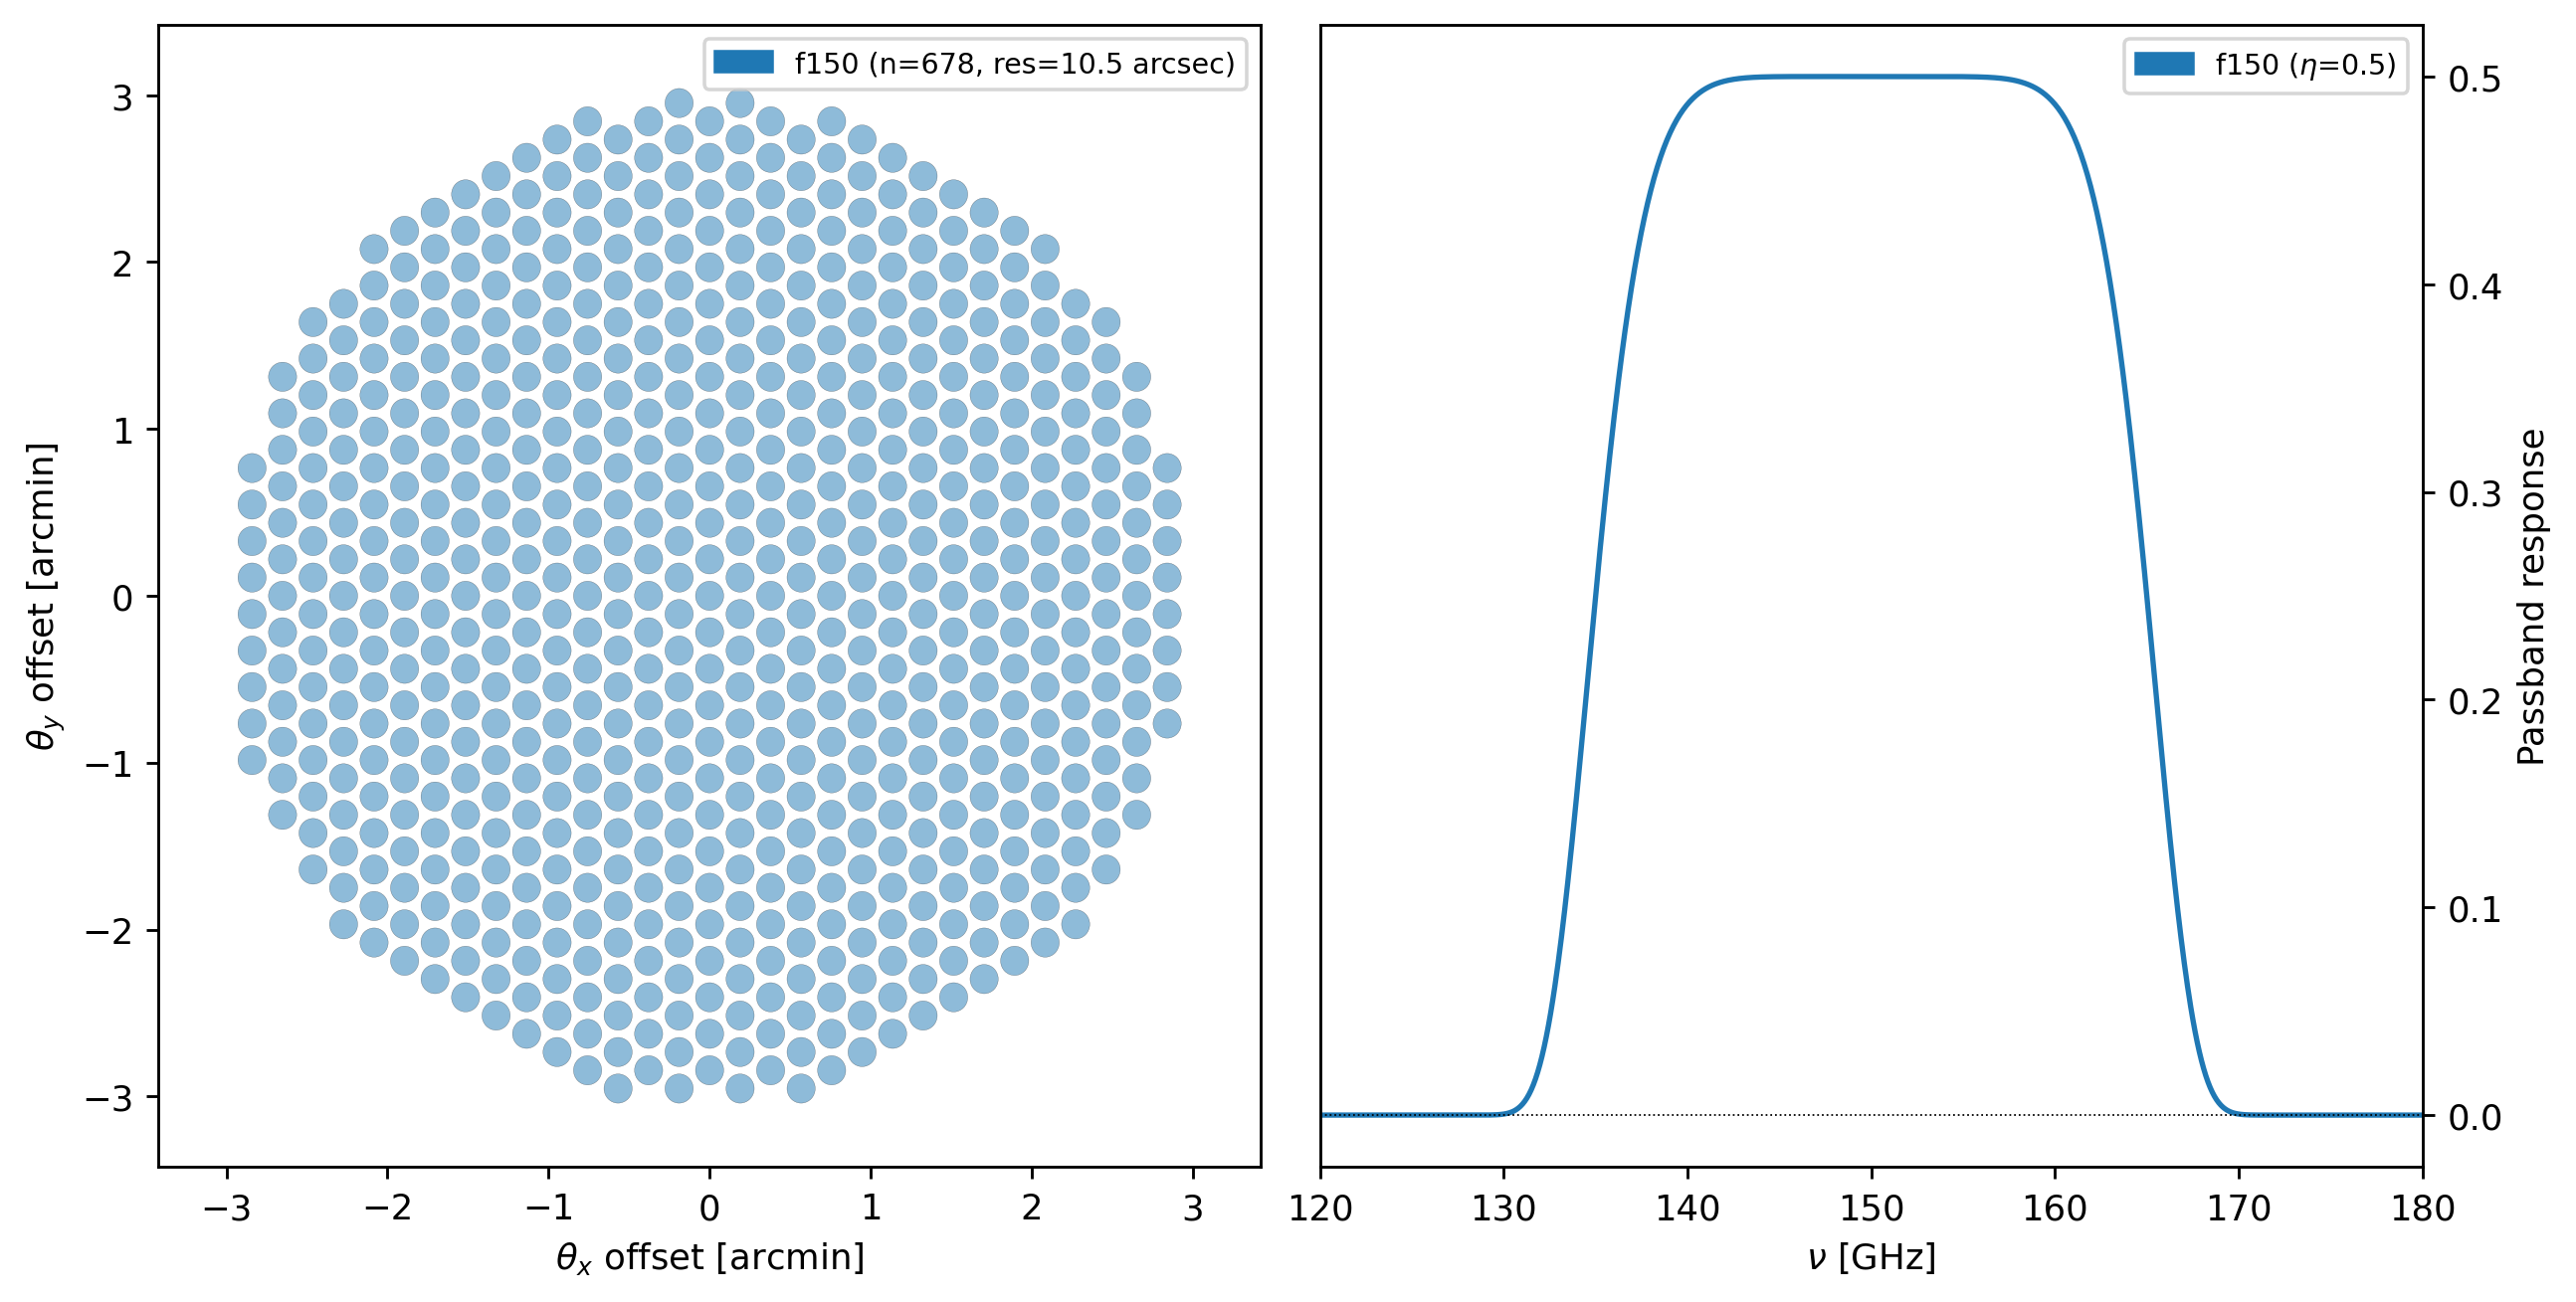

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e1, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.25,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  678  5.953’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(3 plans, 1800 s):
│                            start_time duration   target(ra,dec)     center(az,el)
│ chunk                                                                            
│ 0      2025-11-24 16:33:26.268 +00:00    600 s     (260°, -10°)  (49.69°, 70.94°)
│ 1      2025-11-24 16:44:03.768 +00:00    600 s     (260°, -10°)  (43.51°, 72.73°)
│ 2      2025-11-24 16:54:41.268 +00:00    600 s  (260°, -9.996°)  (36.09°, 74.29°)
├ '2d'
└ ProjectionMap

2025-11-23 20:47:21.995 INFO: Simulating observation 1 of 3


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.59it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:03,  1.68it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:02,  1.72it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.76it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:02<00:01,  1.71it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.73it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:04<00:00,  1.71it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.68it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.70it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 35.04it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 21.19it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 22.48it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.23s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.32it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.64it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.84it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  1.97it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:00,  2.06it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:03<00:00,  2.11it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  2.17it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.85it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.16it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.16it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.22s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.22s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.14it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.14it/s, band=f150]

2025-11-23 20:47:55.775 INFO: Simulated observation 1 of 3 in 33.77 s


2025-11-23 20:47:55.775 INFO: Simulating observation 2 of 3


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.64it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:03,  1.78it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:02,  1.83it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.84it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:02<00:01,  1.87it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.80it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:03<00:00,  1.69it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.63it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.72it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 33.92it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 20.79it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 22.03it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.17s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.39it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:01<00:02,  1.75it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.97it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  2.13it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:00,  2.23it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:03<00:00,  1.98it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  2.05it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.87it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.52it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.51it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:08<00:00,  8.73s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:08<00:00,  8.73s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.77it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.77it/s, band=f150]

2025-11-23 20:48:28.397 INFO: Simulated observation 2 of 3 in 32.61 s


2025-11-23 20:48:28.398 INFO: Simulating observation 3 of 3


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.45it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:03,  1.68it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:02,  1.80it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.85it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:02<00:01,  1.89it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.96it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:03<00:00,  1.94it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.92it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.87it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 37.23it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 21.61it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 23.01it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.21s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.35it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:02,  1.70it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.92it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  2.07it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:00,  2.16it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:03<00:00,  2.29it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  2.24it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.93it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.50it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.49it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.60s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.60s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.77it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.77it/s, band=f150]

2025-11-23 20:49:01.321 INFO: Simulated observation 3 of 3 in 32.91 s


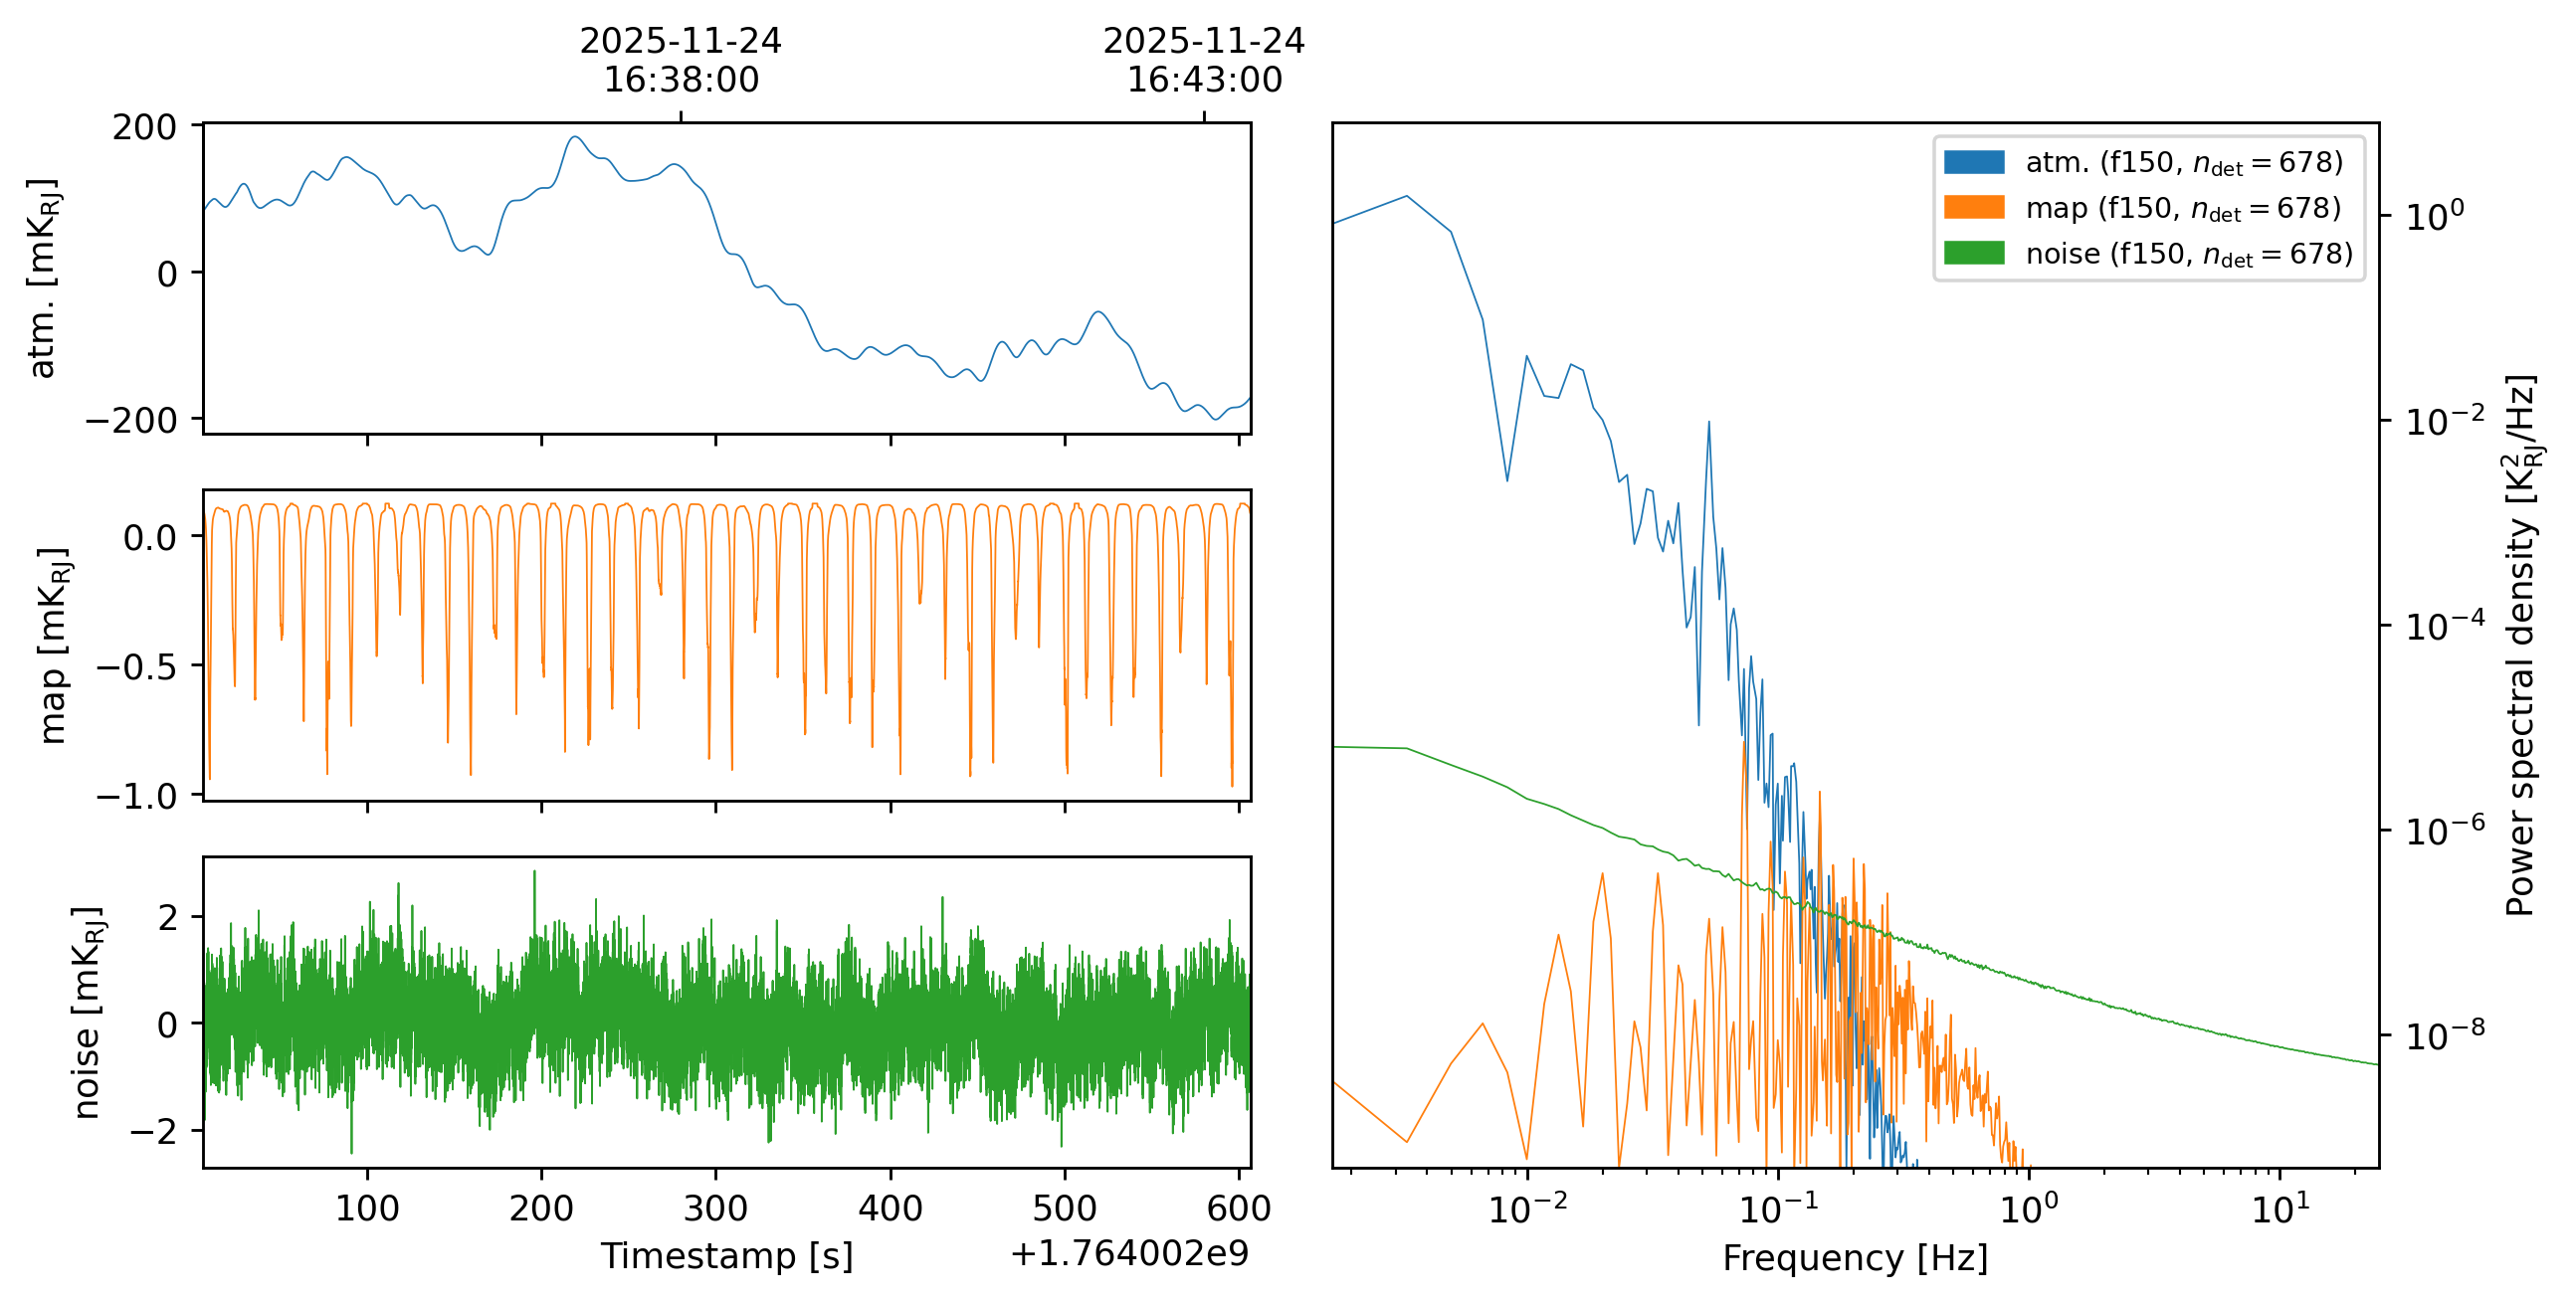

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(tods=tods, 
                                    width=0.8*input_map.width.deg,
                                    height=0.8*input_map.height.deg,
                                    units="Jy/pixel")

2025-11-23 20:49:14.221 INFO: Inferring center {'ra': '17ʰ20ᵐ0.02ˢ', 'dec': '-10°00’1.68”'} for mapper.


2025-11-23 20:49:14.234 INFO: Inferring mapper resolution 0.375’ for mapper from observation patch.


2025-11-23 20:49:14.237 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/3 [00:00<?, ?it/s]

Preprocessing TODs:  33%|█████▎          | 1/3 [00:01<00:02,  1.05s/it]

Preprocessing TODs:  67%|██████████▋     | 2/3 [00:02<00:01,  1.04s/it]

Preprocessing TODs: 100%|████████████████| 3/3 [00:03<00:00,  1.05s/it]

Preprocessing TODs: 100%|████████████████| 3/3 [00:03<00:00,  1.05s/it]

Mapping:   0%|          | 0/3 [00:00<?, ?it/s, tod=1/3]

Mapping:  33%|███▎      | 1/3 [00:03<00:07,  3.55s/it, tod=1/3]

Mapping:  67%|██████▋   | 2/3 [00:06<00:03,  3.11s/it, tod=1/3]

Mapping: 100%|██████████| 3/3 [00:08<00:00,  2.72s/it, tod=1/3]

Mapping: 100%|██████████| 3/3 [00:08<00:00,  2.87s/it, tod=1/3]

Computing noise model:   0%|          | 0/3 [00:00<?, ?it/s]

Computing noise model:   0%|          | 0/3 [00:00<?, ?it/s, tod=1/3]

Computing noise model:  33%|███▎      | 1/3 [00:03<00:07,  3.72s/it, tod=1/3]

Computing noise model:  33%|███▎      | 1/3 [00:03<00:07,  3.72s/it, tod=2/3]

Computing noise model:  67%|██████▋   | 2/3 [00:07<00:03,  3.86s/it, tod=2/3]

Computing noise model:  67%|██████▋   | 2/3 [00:07<00:03,  3.86s/it, tod=3/3]

Computing noise model: 100%|██████████| 3/3 [00:11<00:00,  4.03s/it, tod=3/3]

Computing noise model: 100%|██████████| 3/3 [00:11<00:00,  3.97s/it, tod=3/3]

The initial map is a "guess" constructing by heavily filtering the input TODs:

ProjectionMap:
  shape(stokes, nu, t, y, x): (1, 1, 1, 128, 128)
  stokes: I
  nu: [150.] GHz
  t: [1.76400294e+09]
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -1.249e-02
    max: 4.332e-02
    rms: 1.360e-03
  center:
    ra: 17ʰ20ᵐ0.02ˢ
    dec: -10°00’1.68”
  size(y, x): (0.8°, 0.8°)
  resolution(y, x): (0.375’, 0.375’)
  beam(maj, min, rot): [[[10.4977129 10.4977129  0.       ]]]”
  memory: 0.2621 MB


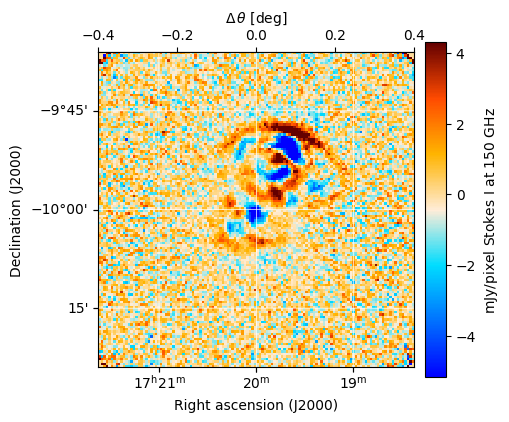

In [7]:
print(ml_mapper.map)
ml_mapper.map.plot(cmap="cmb")

To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e-1)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:08<?, ?it/s, loss=2.195e+07]

epoch 1/4:   3%|▌               | 1/32 [00:08<04:37,  8.95s/it, loss=2.195e+07]

epoch 1/4:   3%|▌               | 1/32 [00:17<04:37,  8.95s/it, loss=1.390e+07]

epoch 1/4:   6%|█               | 2/32 [00:17<04:28,  8.97s/it, loss=1.390e+07]

epoch 1/4:   6%|█               | 2/32 [00:26<04:28,  8.97s/it, loss=9.047e+06]

epoch 1/4:   9%|█▌              | 3/32 [00:26<04:20,  9.00s/it, loss=9.047e+06]

epoch 1/4:   9%|█▌              | 3/32 [00:35<04:20,  9.00s/it, loss=6.148e+06]

epoch 1/4:  12%|██              | 4/32 [00:35<04:11,  9.00s/it, loss=6.148e+06]

epoch 1/4:  12%|██              | 4/32 [00:44<04:11,  9.00s/it, loss=4.394e+06]

epoch 1/4:  16%|██▌             | 5/32 [00:44<04:02,  8.99s/it, loss=4.394e+06]

epoch 1/4:  16%|██▌             | 5/32 [00:53<04:02,  8.99s/it, loss=3.312e+06]

epoch 1/4:  19%|███             | 6/32 [00:53<03:52,  8.93s/it, loss=3.312e+06]

epoch 1/4:  19%|███             | 6/32 [01:02<03:52,  8.93s/it, loss=2.627e+06]

epoch 1/4:  22%|███▌            | 7/32 [01:02<03:43,  8.94s/it, loss=2.627e+06]

epoch 1/4:  22%|███▌            | 7/32 [01:11<03:43,  8.94s/it, loss=2.182e+06]

epoch 1/4:  25%|████            | 8/32 [01:11<03:34,  8.92s/it, loss=2.182e+06]

epoch 1/4:  25%|████            | 8/32 [01:20<03:34,  8.92s/it, loss=1.883e+06]

epoch 1/4:  28%|████▌           | 9/32 [01:20<03:24,  8.89s/it, loss=1.883e+06]

epoch 1/4:  28%|████▌           | 9/32 [01:29<03:24,  8.89s/it, loss=1.674e+06]

epoch 1/4:  31%|█████           | 10/32 [01:29<03:14,  8.85s/it, loss=1.674e+06]

epoch 1/4:  31%|█████           | 10/32 [01:37<03:14,  8.85s/it, loss=1.523e+06]

epoch 1/4:  34%|█████▌          | 11/32 [01:37<03:05,  8.84s/it, loss=1.523e+06]

epoch 1/4:  34%|█████▌          | 11/32 [01:46<03:05,  8.84s/it, loss=1.409e+06]

epoch 1/4:  38%|██████          | 12/32 [01:46<02:55,  8.80s/it, loss=1.409e+06]

epoch 1/4:  38%|██████          | 12/32 [01:55<02:55,  8.80s/it, loss=1.321e+06]

epoch 1/4:  41%|██████▌         | 13/32 [01:55<02:46,  8.77s/it, loss=1.321e+06]

epoch 1/4:  41%|██████▌         | 13/32 [02:04<02:46,  8.77s/it, loss=1.250e+06]

epoch 1/4:  44%|███████         | 14/32 [02:04<02:38,  8.81s/it, loss=1.250e+06]

epoch 1/4:  44%|███████         | 14/32 [02:12<02:38,  8.81s/it, loss=1.192e+06]

epoch 1/4:  47%|███████▌        | 15/32 [02:12<02:28,  8.76s/it, loss=1.192e+06]

epoch 1/4:  47%|███████▌        | 15/32 [02:21<02:28,  8.76s/it, loss=1.142e+06]

epoch 1/4:  50%|████████        | 16/32 [02:21<02:19,  8.72s/it, loss=1.142e+06]

epoch 1/4:  50%|████████        | 16/32 [02:30<02:19,  8.72s/it, loss=1.100e+06]

epoch 1/4:  53%|████████▌       | 17/32 [02:30<02:10,  8.69s/it, loss=1.100e+06]

epoch 1/4:  53%|████████▌       | 17/32 [02:38<02:10,  8.69s/it, loss=1.063e+06]

epoch 1/4:  56%|█████████       | 18/32 [02:38<02:01,  8.67s/it, loss=1.063e+06]

epoch 1/4:  56%|█████████       | 18/32 [02:47<02:01,  8.67s/it, loss=1.029e+06]

epoch 1/4:  59%|█████████▌      | 19/32 [02:47<01:52,  8.66s/it, loss=1.029e+06]

epoch 1/4:  59%|█████████▌      | 19/32 [02:56<01:52,  8.66s/it, loss=9.998e+05]

epoch 1/4:  62%|██████████      | 20/32 [02:56<01:43,  8.65s/it, loss=9.998e+05]

epoch 1/4:  62%|██████████      | 20/32 [03:04<01:43,  8.65s/it, loss=9.729e+05]

epoch 1/4:  66%|██████████▌     | 21/32 [03:04<01:35,  8.64s/it, loss=9.729e+05]

epoch 1/4:  66%|██████████▌     | 21/32 [03:13<01:35,  8.64s/it, loss=9.484e+05]

epoch 1/4:  69%|███████████     | 22/32 [03:13<01:26,  8.64s/it, loss=9.484e+05]

epoch 1/4:  69%|███████████     | 22/32 [03:21<01:26,  8.64s/it, loss=9.260e+05]

epoch 1/4:  72%|███████████▌    | 23/32 [03:21<01:17,  8.65s/it, loss=9.260e+05]

epoch 1/4:  72%|███████████▌    | 23/32 [03:30<01:17,  8.65s/it, loss=9.052e+05]

epoch 1/4:  75%|████████████    | 24/32 [03:30<01:09,  8.64s/it, loss=9.052e+05]

epoch 1/4:  75%|████████████    | 24/32 [03:39<01:09,  8.64s/it, loss=8.861e+05]

epoch 1/4:  78%|████████████▌   | 25/32 [03:39<01:00,  8.63s/it, loss=8.861e+05]

epoch 1/4:  78%|████████████▌   | 25/32 [03:47<01:00,  8.63s/it, loss=8.683e+05]

epoch 1/4:  81%|█████████████   | 26/32 [03:47<00:51,  8.64s/it, loss=8.683e+05]

epoch 1/4:  81%|█████████████   | 26/32 [03:56<00:51,  8.64s/it, loss=8.518e+05]

epoch 1/4:  84%|█████████████▌  | 27/32 [03:56<00:43,  8.64s/it, loss=8.518e+05]

epoch 1/4:  84%|█████████████▌  | 27/32 [04:05<00:43,  8.64s/it, loss=8.364e+05]

epoch 1/4:  88%|██████████████  | 28/32 [04:05<00:34,  8.65s/it, loss=8.364e+05]

epoch 1/4:  88%|██████████████  | 28/32 [04:13<00:34,  8.65s/it, loss=8.220e+05]

epoch 1/4:  91%|██████████████▌ | 29/32 [04:13<00:26,  8.67s/it, loss=8.220e+05]

epoch 1/4:  91%|██████████████▌ | 29/32 [04:22<00:26,  8.67s/it, loss=8.086e+05]

epoch 1/4:  94%|███████████████ | 30/32 [04:22<00:17,  8.68s/it, loss=8.086e+05]

epoch 1/4:  94%|███████████████ | 30/32 [04:31<00:17,  8.68s/it, loss=7.960e+05]

epoch 1/4:  97%|███████████████▌| 31/32 [04:31<00:08,  8.69s/it, loss=7.960e+05]

epoch 1/4:  97%|███████████████▌| 31/32 [04:40<00:08,  8.69s/it, loss=7.842e+05]

epoch 1/4: 100%|████████████████| 32/32 [04:40<00:00,  8.69s/it, loss=7.842e+05]

epoch 1/4: 100%|████████████████| 32/32 [04:40<00:00,  8.75s/it, loss=7.842e+05]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:08<?, ?it/s, loss=7.731e+05]

epoch 2/4:   3%|▌               | 1/32 [00:08<04:28,  8.65s/it, loss=7.731e+05]

epoch 2/4:   3%|▌               | 1/32 [00:17<04:28,  8.65s/it, loss=7.627e+05]

epoch 2/4:   6%|█               | 2/32 [00:17<04:19,  8.64s/it, loss=7.627e+05]

epoch 2/4:   6%|█               | 2/32 [00:25<04:19,  8.64s/it, loss=7.530e+05]

epoch 2/4:   9%|█▌              | 3/32 [00:25<04:10,  8.65s/it, loss=7.530e+05]

epoch 2/4:   9%|█▌              | 3/32 [00:34<04:10,  8.65s/it, loss=7.438e+05]

epoch 2/4:  12%|██              | 4/32 [00:34<04:02,  8.65s/it, loss=7.438e+05]

epoch 2/4:  12%|██              | 4/32 [00:43<04:02,  8.65s/it, loss=7.352e+05]

epoch 2/4:  16%|██▌             | 5/32 [00:43<03:53,  8.64s/it, loss=7.352e+05]

epoch 2/4:  16%|██▌             | 5/32 [00:51<03:53,  8.64s/it, loss=7.270e+05]

epoch 2/4:  19%|███             | 6/32 [00:51<03:44,  8.65s/it, loss=7.270e+05]

epoch 2/4:  19%|███             | 6/32 [01:00<03:44,  8.65s/it, loss=7.194e+05]

epoch 2/4:  22%|███▌            | 7/32 [01:00<03:36,  8.65s/it, loss=7.194e+05]

epoch 2/4:  22%|███▌            | 7/32 [01:09<03:36,  8.65s/it, loss=7.122e+05]

epoch 2/4:  25%|████            | 8/32 [01:09<03:27,  8.64s/it, loss=7.122e+05]

epoch 2/4:  25%|████            | 8/32 [01:17<03:27,  8.64s/it, loss=7.054e+05]

epoch 2/4:  28%|████▌           | 9/32 [01:17<03:18,  8.64s/it, loss=7.054e+05]

epoch 2/4:  28%|████▌           | 9/32 [01:26<03:18,  8.64s/it, loss=6.990e+05]

epoch 2/4:  31%|█████           | 10/32 [01:26<03:09,  8.64s/it, loss=6.990e+05]

epoch 2/4:  31%|█████           | 10/32 [01:35<03:09,  8.64s/it, loss=6.929e+05]

epoch 2/4:  34%|█████▌          | 11/32 [01:35<03:01,  8.66s/it, loss=6.929e+05]

epoch 2/4:  34%|█████▌          | 11/32 [01:43<03:01,  8.66s/it, loss=6.872e+05]

epoch 2/4:  38%|██████          | 12/32 [01:43<02:53,  8.67s/it, loss=6.872e+05]

epoch 2/4:  38%|██████          | 12/32 [01:52<02:53,  8.67s/it, loss=6.819e+05]

epoch 2/4:  41%|██████▌         | 13/32 [01:52<02:44,  8.66s/it, loss=6.819e+05]

epoch 2/4:  41%|██████▌         | 13/32 [02:01<02:44,  8.66s/it, loss=6.768e+05]

epoch 2/4:  44%|███████         | 14/32 [02:01<02:35,  8.65s/it, loss=6.768e+05]

epoch 2/4:  44%|███████         | 14/32 [02:09<02:35,  8.65s/it, loss=6.720e+05]

epoch 2/4:  47%|███████▌        | 15/32 [02:09<02:26,  8.64s/it, loss=6.720e+05]

epoch 2/4:  47%|███████▌        | 15/32 [02:18<02:26,  8.64s/it, loss=6.674e+05]

epoch 2/4:  50%|████████        | 16/32 [02:18<02:18,  8.65s/it, loss=6.674e+05]

epoch 2/4:  50%|████████        | 16/32 [02:27<02:18,  8.65s/it, loss=6.631e+05]

epoch 2/4:  53%|████████▌       | 17/32 [02:27<02:09,  8.65s/it, loss=6.631e+05]

epoch 2/4:  53%|████████▌       | 17/32 [02:35<02:09,  8.65s/it, loss=6.591e+05]

epoch 2/4:  56%|█████████       | 18/32 [02:35<02:01,  8.64s/it, loss=6.591e+05]

epoch 2/4:  56%|█████████       | 18/32 [02:44<02:01,  8.64s/it, loss=6.552e+05]

epoch 2/4:  59%|█████████▌      | 19/32 [02:44<01:52,  8.64s/it, loss=6.552e+05]

epoch 2/4:  59%|█████████▌      | 19/32 [02:52<01:52,  8.64s/it, loss=6.516e+05]

epoch 2/4:  62%|██████████      | 20/32 [02:52<01:43,  8.65s/it, loss=6.516e+05]

epoch 2/4:  62%|██████████      | 20/32 [03:01<01:43,  8.65s/it, loss=6.481e+05]

epoch 2/4:  66%|██████████▌     | 21/32 [03:01<01:35,  8.68s/it, loss=6.481e+05]

epoch 2/4:  66%|██████████▌     | 21/32 [03:10<01:35,  8.68s/it, loss=6.448e+05]

epoch 2/4:  69%|███████████     | 22/32 [03:10<01:26,  8.67s/it, loss=6.448e+05]

epoch 2/4:  69%|███████████     | 22/32 [03:19<01:26,  8.67s/it, loss=6.417e+05]

epoch 2/4:  72%|███████████▌    | 23/32 [03:19<01:17,  8.66s/it, loss=6.417e+05]

epoch 2/4:  72%|███████████▌    | 23/32 [03:27<01:17,  8.66s/it, loss=6.387e+05]

epoch 2/4:  75%|████████████    | 24/32 [03:27<01:09,  8.66s/it, loss=6.387e+05]

epoch 2/4:  75%|████████████    | 24/32 [03:36<01:09,  8.66s/it, loss=6.359e+05]

epoch 2/4:  78%|████████████▌   | 25/32 [03:36<01:00,  8.65s/it, loss=6.359e+05]

epoch 2/4:  78%|████████████▌   | 25/32 [03:44<01:00,  8.65s/it, loss=6.332e+05]

epoch 2/4:  81%|█████████████   | 26/32 [03:44<00:51,  8.64s/it, loss=6.332e+05]

epoch 2/4:  81%|█████████████   | 26/32 [03:53<00:51,  8.64s/it, loss=6.306e+05]

epoch 2/4:  84%|█████████████▌  | 27/32 [03:53<00:43,  8.64s/it, loss=6.306e+05]

epoch 2/4:  84%|█████████████▌  | 27/32 [04:02<00:43,  8.64s/it, loss=6.282e+05]

epoch 2/4:  88%|██████████████  | 28/32 [04:02<00:34,  8.63s/it, loss=6.282e+05]

epoch 2/4:  88%|██████████████  | 28/32 [04:10<00:34,  8.63s/it, loss=6.259e+05]

epoch 2/4:  91%|██████████████▌ | 29/32 [04:10<00:25,  8.63s/it, loss=6.259e+05]

epoch 2/4:  91%|██████████████▌ | 29/32 [04:19<00:25,  8.63s/it, loss=6.237e+05]

epoch 2/4:  94%|███████████████ | 30/32 [04:19<00:17,  8.63s/it, loss=6.237e+05]

epoch 2/4:  94%|███████████████ | 30/32 [04:27<00:17,  8.63s/it, loss=6.215e+05]

epoch 2/4:  97%|███████████████▌| 31/32 [04:27<00:08,  8.62s/it, loss=6.215e+05]

epoch 2/4:  97%|███████████████▌| 31/32 [04:36<00:08,  8.62s/it, loss=6.195e+05]

epoch 2/4: 100%|████████████████| 32/32 [04:36<00:00,  8.62s/it, loss=6.195e+05]

epoch 2/4: 100%|████████████████| 32/32 [04:36<00:00,  8.64s/it, loss=6.195e+05]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:08<?, ?it/s, loss=6.176e+05]

epoch 3/4:   3%|▌               | 1/32 [00:08<04:29,  8.68s/it, loss=6.176e+05]

epoch 3/4:   3%|▌               | 1/32 [00:17<04:29,  8.68s/it, loss=6.157e+05]

epoch 3/4:   6%|█               | 2/32 [00:17<04:20,  8.67s/it, loss=6.157e+05]

epoch 3/4:   6%|█               | 2/32 [00:25<04:20,  8.67s/it, loss=6.139e+05]

epoch 3/4:   9%|█▌              | 3/32 [00:25<04:11,  8.66s/it, loss=6.139e+05]

epoch 3/4:   9%|█▌              | 3/32 [00:34<04:11,  8.66s/it, loss=6.122e+05]

epoch 3/4:  12%|██              | 4/32 [00:34<04:02,  8.66s/it, loss=6.122e+05]

epoch 3/4:  12%|██              | 4/32 [00:43<04:02,  8.66s/it, loss=6.105e+05]

epoch 3/4:  16%|██▌             | 5/32 [00:43<03:53,  8.66s/it, loss=6.105e+05]

epoch 3/4:  16%|██▌             | 5/32 [00:51<03:53,  8.66s/it, loss=6.089e+05]

epoch 3/4:  19%|███             | 6/32 [00:51<03:45,  8.67s/it, loss=6.089e+05]

epoch 3/4:  19%|███             | 6/32 [01:00<03:45,  8.67s/it, loss=6.074e+05]

epoch 3/4:  22%|███▌            | 7/32 [01:00<03:36,  8.68s/it, loss=6.074e+05]

epoch 3/4:  22%|███▌            | 7/32 [01:09<03:36,  8.68s/it, loss=6.059e+05]

epoch 3/4:  25%|████            | 8/32 [01:09<03:28,  8.67s/it, loss=6.059e+05]

epoch 3/4:  25%|████            | 8/32 [01:18<03:28,  8.67s/it, loss=6.045e+05]

epoch 3/4:  28%|████▌           | 9/32 [01:18<03:19,  8.67s/it, loss=6.045e+05]

epoch 3/4:  28%|████▌           | 9/32 [01:26<03:19,  8.67s/it, loss=6.031e+05]

epoch 3/4:  31%|█████           | 10/32 [01:26<03:10,  8.67s/it, loss=6.031e+05]

epoch 3/4:  31%|█████           | 10/32 [01:35<03:10,  8.67s/it, loss=6.018e+05]

epoch 3/4:  34%|█████▌          | 11/32 [01:35<03:02,  8.67s/it, loss=6.018e+05]

epoch 3/4:  34%|█████▌          | 11/32 [01:43<03:02,  8.67s/it, loss=6.005e+05]

epoch 3/4:  38%|██████          | 12/32 [01:43<02:53,  8.66s/it, loss=6.005e+05]

epoch 3/4:  38%|██████          | 12/32 [01:52<02:53,  8.66s/it, loss=5.993e+05]

epoch 3/4:  41%|██████▌         | 13/32 [01:52<02:44,  8.66s/it, loss=5.993e+05]

epoch 3/4:  41%|██████▌         | 13/32 [02:01<02:44,  8.66s/it, loss=5.981e+05]

epoch 3/4:  44%|███████         | 14/32 [02:01<02:35,  8.66s/it, loss=5.981e+05]

epoch 3/4:  44%|███████         | 14/32 [02:10<02:35,  8.66s/it, loss=5.969e+05]

epoch 3/4:  47%|███████▌        | 15/32 [02:10<02:27,  8.67s/it, loss=5.969e+05]

epoch 3/4:  47%|███████▌        | 15/32 [02:18<02:27,  8.67s/it, loss=5.957e+05]

epoch 3/4:  50%|████████        | 16/32 [02:18<02:18,  8.66s/it, loss=5.957e+05]

epoch 3/4:  50%|████████        | 16/32 [02:27<02:18,  8.66s/it, loss=5.946e+05]

epoch 3/4:  53%|████████▌       | 17/32 [02:27<02:09,  8.66s/it, loss=5.946e+05]

epoch 3/4:  53%|████████▌       | 17/32 [02:36<02:09,  8.66s/it, loss=5.935e+05]

epoch 3/4:  56%|█████████       | 18/32 [02:36<02:01,  8.67s/it, loss=5.935e+05]

epoch 3/4:  56%|█████████       | 18/32 [02:44<02:01,  8.67s/it, loss=5.924e+05]

epoch 3/4:  59%|█████████▌      | 19/32 [02:44<01:52,  8.68s/it, loss=5.924e+05]

epoch 3/4:  59%|█████████▌      | 19/32 [02:53<01:52,  8.68s/it, loss=5.914e+05]

epoch 3/4:  62%|██████████      | 20/32 [02:53<01:44,  8.67s/it, loss=5.914e+05]

epoch 3/4:  62%|██████████      | 20/32 [03:02<01:44,  8.67s/it, loss=5.904e+05]

epoch 3/4:  66%|██████████▌     | 21/32 [03:02<01:35,  8.68s/it, loss=5.904e+05]

epoch 3/4:  66%|██████████▌     | 21/32 [03:10<01:35,  8.68s/it, loss=5.894e+05]

epoch 3/4:  69%|███████████     | 22/32 [03:10<01:26,  8.69s/it, loss=5.894e+05]

epoch 3/4:  69%|███████████     | 22/32 [03:19<01:26,  8.69s/it, loss=5.884e+05]

epoch 3/4:  72%|███████████▌    | 23/32 [03:19<01:18,  8.69s/it, loss=5.884e+05]

epoch 3/4:  72%|███████████▌    | 23/32 [03:28<01:18,  8.69s/it, loss=5.874e+05]

epoch 3/4:  75%|████████████    | 24/32 [03:28<01:09,  8.69s/it, loss=5.874e+05]

epoch 3/4:  75%|████████████    | 24/32 [03:36<01:09,  8.69s/it, loss=5.865e+05]

epoch 3/4:  78%|████████████▌   | 25/32 [03:36<01:00,  8.68s/it, loss=5.865e+05]

epoch 3/4:  78%|████████████▌   | 25/32 [03:45<01:00,  8.68s/it, loss=5.855e+05]

epoch 3/4:  81%|█████████████   | 26/32 [03:45<00:52,  8.69s/it, loss=5.855e+05]

epoch 3/4:  81%|█████████████   | 26/32 [03:54<00:52,  8.69s/it, loss=5.846e+05]

epoch 3/4:  84%|█████████████▌  | 27/32 [03:54<00:43,  8.70s/it, loss=5.846e+05]

epoch 3/4:  84%|█████████████▌  | 27/32 [04:02<00:43,  8.70s/it, loss=5.837e+05]

epoch 3/4:  88%|██████████████  | 28/32 [04:02<00:34,  8.71s/it, loss=5.837e+05]

epoch 3/4:  88%|██████████████  | 28/32 [04:11<00:34,  8.71s/it, loss=5.828e+05]

epoch 3/4:  91%|██████████████▌ | 29/32 [04:11<00:26,  8.72s/it, loss=5.828e+05]

epoch 3/4:  91%|██████████████▌ | 29/32 [04:20<00:26,  8.72s/it, loss=5.819e+05]

epoch 3/4:  94%|███████████████ | 30/32 [04:20<00:17,  8.71s/it, loss=5.819e+05]

epoch 3/4:  94%|███████████████ | 30/32 [04:29<00:17,  8.71s/it, loss=5.810e+05]

epoch 3/4:  97%|███████████████▌| 31/32 [04:29<00:08,  8.70s/it, loss=5.810e+05]

epoch 3/4:  97%|███████████████▌| 31/32 [04:37<00:08,  8.70s/it, loss=5.802e+05]

epoch 3/4: 100%|████████████████| 32/32 [04:37<00:00,  8.69s/it, loss=5.802e+05]

epoch 3/4: 100%|████████████████| 32/32 [04:37<00:00,  8.68s/it, loss=5.802e+05]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:08<?, ?it/s, loss=5.793e+05]

epoch 4/4:   3%|▌               | 1/32 [00:08<04:28,  8.66s/it, loss=5.793e+05]

epoch 4/4:   3%|▌               | 1/32 [00:17<04:28,  8.66s/it, loss=5.785e+05]

epoch 4/4:   6%|█               | 2/32 [00:17<04:20,  8.68s/it, loss=5.785e+05]

epoch 4/4:   6%|█               | 2/32 [00:26<04:20,  8.68s/it, loss=5.776e+05]

epoch 4/4:   9%|█▌              | 3/32 [00:26<04:11,  8.68s/it, loss=5.776e+05]

epoch 4/4:   9%|█▌              | 3/32 [00:34<04:11,  8.68s/it, loss=5.768e+05]

epoch 4/4:  12%|██              | 4/32 [00:34<04:02,  8.67s/it, loss=5.768e+05]

epoch 4/4:  12%|██              | 4/32 [00:43<04:02,  8.67s/it, loss=5.760e+05]

epoch 4/4:  16%|██▌             | 5/32 [00:43<03:54,  8.68s/it, loss=5.760e+05]

epoch 4/4:  16%|██▌             | 5/32 [00:52<03:54,  8.68s/it, loss=5.751e+05]

epoch 4/4:  19%|███             | 6/32 [00:52<03:46,  8.70s/it, loss=5.751e+05]

epoch 4/4:  19%|███             | 6/32 [01:00<03:46,  8.70s/it, loss=5.743e+05]

epoch 4/4:  22%|███▌            | 7/32 [01:00<03:37,  8.68s/it, loss=5.743e+05]

epoch 4/4:  22%|███▌            | 7/32 [01:09<03:37,  8.68s/it, loss=5.735e+05]

epoch 4/4:  25%|████            | 8/32 [01:09<03:28,  8.68s/it, loss=5.735e+05]

epoch 4/4:  25%|████            | 8/32 [01:18<03:28,  8.68s/it, loss=5.727e+05]

epoch 4/4:  28%|████▌           | 9/32 [01:18<03:19,  8.67s/it, loss=5.727e+05]

epoch 4/4:  28%|████▌           | 9/32 [01:26<03:19,  8.67s/it, loss=5.719e+05]

epoch 4/4:  31%|█████           | 10/32 [01:26<03:10,  8.67s/it, loss=5.719e+05]

epoch 4/4:  31%|█████           | 10/32 [01:35<03:10,  8.67s/it, loss=5.711e+05]

epoch 4/4:  34%|█████▌          | 11/32 [01:35<03:01,  8.67s/it, loss=5.711e+05]

epoch 4/4:  34%|█████▌          | 11/32 [01:44<03:01,  8.67s/it, loss=5.703e+05]

epoch 4/4:  38%|██████          | 12/32 [01:44<02:53,  8.68s/it, loss=5.703e+05]

epoch 4/4:  38%|██████          | 12/32 [01:52<02:53,  8.68s/it, loss=5.695e+05]

epoch 4/4:  41%|██████▌         | 13/32 [01:52<02:44,  8.68s/it, loss=5.695e+05]

epoch 4/4:  41%|██████▌         | 13/32 [02:01<02:44,  8.68s/it, loss=5.688e+05]

epoch 4/4:  44%|███████         | 14/32 [02:01<02:36,  8.68s/it, loss=5.688e+05]

epoch 4/4:  44%|███████         | 14/32 [02:10<02:36,  8.68s/it, loss=5.680e+05]

epoch 4/4:  47%|███████▌        | 15/32 [02:10<02:27,  8.68s/it, loss=5.680e+05]

epoch 4/4:  47%|███████▌        | 15/32 [02:18<02:27,  8.68s/it, loss=5.672e+05]

epoch 4/4:  50%|████████        | 16/32 [02:18<02:18,  8.68s/it, loss=5.672e+05]

epoch 4/4:  50%|████████        | 16/32 [02:27<02:18,  8.68s/it, loss=5.664e+05]

epoch 4/4:  53%|████████▌       | 17/32 [02:27<02:10,  8.67s/it, loss=5.664e+05]

epoch 4/4:  53%|████████▌       | 17/32 [02:36<02:10,  8.67s/it, loss=5.656e+05]

epoch 4/4:  56%|█████████       | 18/32 [02:36<02:01,  8.66s/it, loss=5.656e+05]

epoch 4/4:  56%|█████████       | 18/32 [02:44<02:01,  8.66s/it, loss=5.649e+05]

epoch 4/4:  59%|█████████▌      | 19/32 [02:44<01:52,  8.65s/it, loss=5.649e+05]

epoch 4/4:  59%|█████████▌      | 19/32 [02:53<01:52,  8.65s/it, loss=5.641e+05]

epoch 4/4:  62%|██████████      | 20/32 [02:53<01:43,  8.67s/it, loss=5.641e+05]

epoch 4/4:  62%|██████████      | 20/32 [03:02<01:43,  8.67s/it, loss=5.633e+05]

epoch 4/4:  66%|██████████▌     | 21/32 [03:02<01:35,  8.69s/it, loss=5.633e+05]

epoch 4/4:  66%|██████████▌     | 21/32 [03:10<01:35,  8.69s/it, loss=5.626e+05]

epoch 4/4:  69%|███████████     | 22/32 [03:10<01:27,  8.70s/it, loss=5.626e+05]

epoch 4/4:  69%|███████████     | 22/32 [03:19<01:27,  8.70s/it, loss=5.618e+05]

epoch 4/4:  72%|███████████▌    | 23/32 [03:19<01:18,  8.70s/it, loss=5.618e+05]

epoch 4/4:  72%|███████████▌    | 23/32 [03:28<01:18,  8.70s/it, loss=5.610e+05]

epoch 4/4:  75%|████████████    | 24/32 [03:28<01:09,  8.71s/it, loss=5.610e+05]

epoch 4/4:  75%|████████████    | 24/32 [03:37<01:09,  8.71s/it, loss=5.603e+05]

epoch 4/4:  78%|████████████▌   | 25/32 [03:37<01:01,  8.72s/it, loss=5.603e+05]

epoch 4/4:  78%|████████████▌   | 25/32 [03:45<01:01,  8.72s/it, loss=5.595e+05]

epoch 4/4:  81%|█████████████   | 26/32 [03:45<00:52,  8.72s/it, loss=5.595e+05]

epoch 4/4:  81%|█████████████   | 26/32 [03:54<00:52,  8.72s/it, loss=5.588e+05]

epoch 4/4:  84%|█████████████▌  | 27/32 [03:54<00:43,  8.71s/it, loss=5.588e+05]

epoch 4/4:  84%|█████████████▌  | 27/32 [04:03<00:43,  8.71s/it, loss=5.580e+05]

epoch 4/4:  88%|██████████████  | 28/32 [04:03<00:34,  8.71s/it, loss=5.580e+05]

epoch 4/4:  88%|██████████████  | 28/32 [04:11<00:34,  8.71s/it, loss=5.573e+05]

epoch 4/4:  91%|██████████████▌ | 29/32 [04:11<00:26,  8.71s/it, loss=5.573e+05]

epoch 4/4:  91%|██████████████▌ | 29/32 [04:20<00:26,  8.71s/it, loss=5.565e+05]

epoch 4/4:  94%|███████████████ | 30/32 [04:20<00:17,  8.70s/it, loss=5.565e+05]

epoch 4/4:  94%|███████████████ | 30/32 [04:29<00:17,  8.70s/it, loss=5.558e+05]

epoch 4/4:  97%|███████████████▌| 31/32 [04:29<00:08,  8.69s/it, loss=5.558e+05]

epoch 4/4:  97%|███████████████▌| 31/32 [04:37<00:08,  8.69s/it, loss=5.550e+05]

epoch 4/4: 100%|████████████████| 32/32 [04:37<00:00,  8.68s/it, loss=5.550e+05]

epoch 4/4: 100%|████████████████| 32/32 [04:37<00:00,  8.69s/it, loss=5.550e+05]

which gives us an improved map

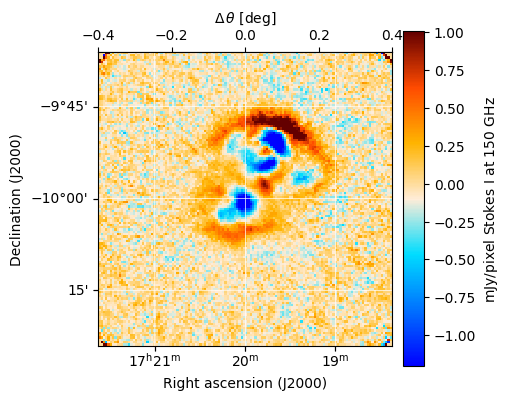

In [9]:
ml_mapper.map.plot(cmap="cmb")

that will improve more as it continues to fit.